In [ ]:
pip install seaborn pandas matplotlib scipy scikit_posthocs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scikit_posthocs as sp
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

exp_json = "./experiment-20260218.json"

methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment-20260218.csv")
#print("Experiment:")
#print(df)

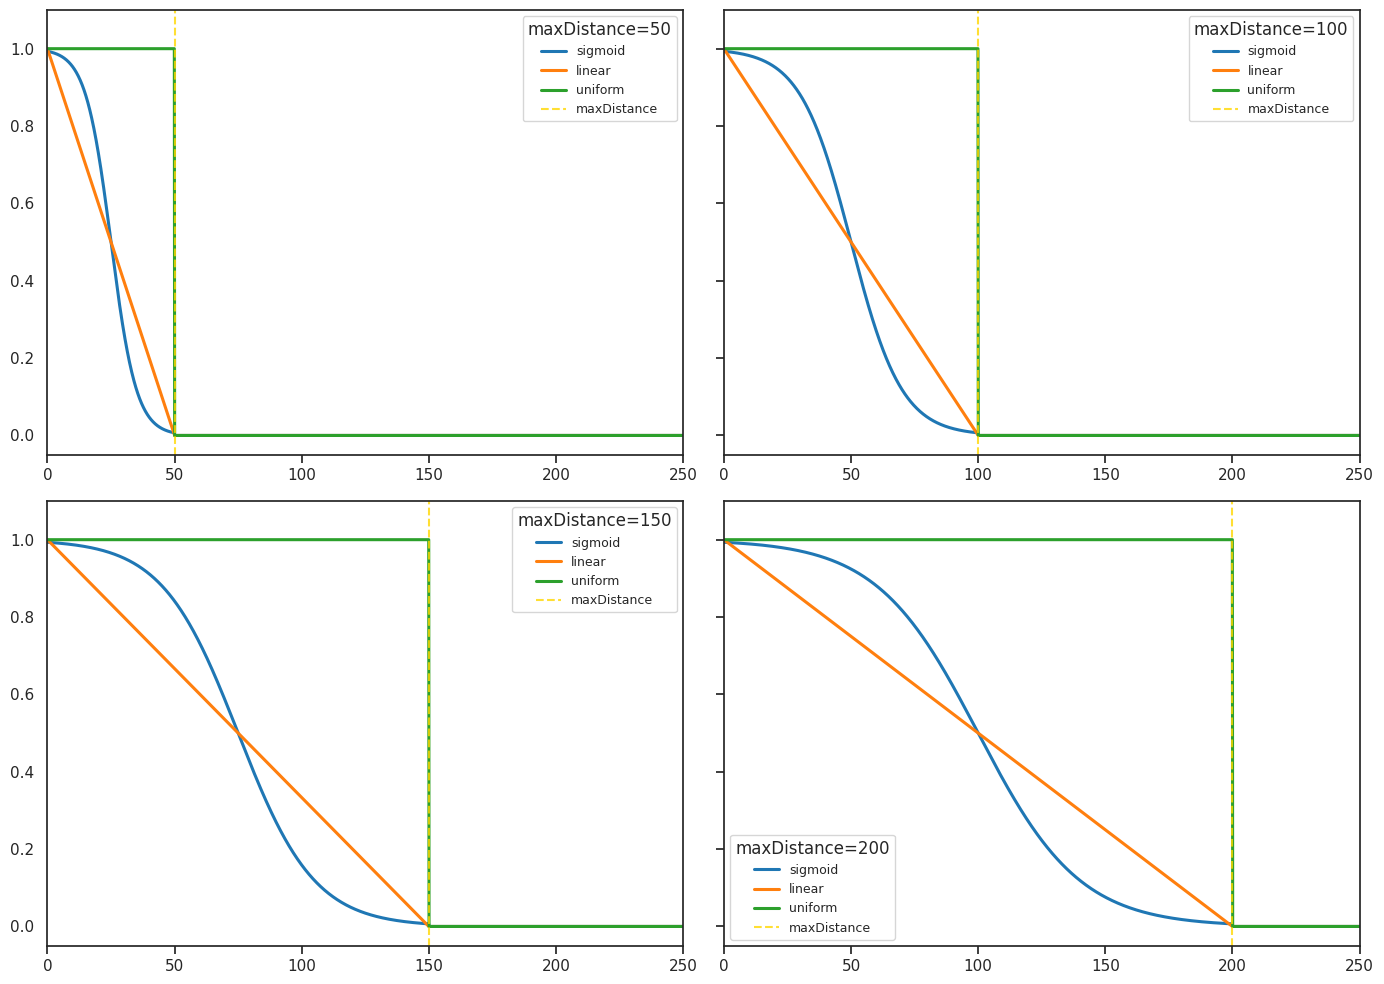

In [6]:
def sigmoid(d, maxDistance):
    return np.where(d >= maxDistance, 0,
             1 / (1 + np.exp((10 / maxDistance) * (d - maxDistance / 2))))

def linear(d, maxDistance):
    return np.maximum(0, 1 - d / maxDistance)

def uniform(d, maxDistance):
    return np.where(d < maxDistance, 1, 0).astype(float)

max_distances = [50, 100, 150, 200]
functions = [("sigmoid", sigmoid), ("linear", linear), ("uniform", uniform)]
x = np.linspace(0, 250, 2000)

sns.set_theme(style="white")
palette = sns.color_palette("tab10")

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True, sharex=False)

for ax, md in zip(axes.flatten(), max_distances):
    for i, (fname, fn) in enumerate(functions):
        ax.plot(x, fn(x, md), label=fname, linewidth=2.2, color=palette[i])
    ax.axvline(x=md, color="gold", linestyle="--", linewidth=1.5, alpha=0.8, label="maxDistance")
    ax.set_xlim(0, 250)
    ax.set_ylim(-0.05, 1.1)
    ax.legend(title=f"maxDistance={md}", fontsize=9)

# top row: show x tick labels on bottom only
for ax in axes[0, :]:
    ax.tick_params(bottom=True, labelbottom=True, top=False, labeltop=False)

# bottom row: show x tick labels on bottom
for ax in axes[1, :]:
    ax.tick_params(bottom=True, labelbottom=True)

# y labels only on left column
for ax in axes[:, 1]:
    ax.tick_params(left=True, labelleft=False)

plt.tight_layout()
plt.savefig("falloff.png", dpi=600, bbox_inches="tight")
#print("done")